# Forest Visualization

## Importing modules

In [576]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Preprocessing

In [577]:
df = pd.read_csv('./forestfires.csv')

In [578]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,6,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


#### Check for null values

In [579]:
df.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [580]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.667311,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.312243,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


### Converting categorical strings to numbers

In [581]:
cat_columns = ['month', 'day']
# df[cat_columns].apply(lambda x: x.cat.codes)
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,6,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [582]:
cats = [['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
       ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']]

for i, column in enumerate(cat_columns):
    df[column] = [cats[i].index(col) for col in df[column]]
    df[column] = df[column].astype('category')
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,6,5,2,4,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,9,1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,9,5,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,2,4,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,2,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [583]:
def remove_outliers(df, selected_cols):
    df2 = df.copy()
    min_quartile = df2.quantile(0.25)
    max_quartile = df2.quantile(0.75)
    iqr = max_quartile - min_quartile
    max_values = max_quartile + 1.5 * iqr
    min_values = min_quartile - 1.5 * iqr
    df2[selected_cols] = df2[selected_cols][df2[selected_cols] <= max_values]
    df2[selected_cols] = df2[selected_cols][df2[selected_cols] >= min_values]
    df2 = df2.dropna()
    return df2

In [584]:
df2 = remove_outliers(df, ['FFMC', 'DMC', 'RH', 'ISI'])

In [585]:
df2.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000
mean,4.563549,4.244604,91.846523,113.034293,569.649161,9.246763,19.785372,41.930456,3.847722,0.025899,13.977818
std,2.329042,1.237486,1.896034,52.992685,229.288148,3.059843,4.863265,13.672595,1.672041,0.329190,70.406181
min,1.000000,2.000000,86.200000,6.600000,18.700000,3.200000,5.500000,15.000000,0.400000,0.000000,0.000000
25%,2.000000,4.000000,91.000000,85.100000,513.300000,7.100000,16.800000,32.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.800000,110.900000,668.000000,8.600000,19.700000,40.000000,3.600000,0.000000,0.430000
75%,6.000000,5.000000,92.900000,142.400000,715.100000,11.000000,23.000000,50.000000,4.900000,0.000000,6.040000
max,9.000000,9.000000,96.200000,248.400000,822.800000,17.000000,33.300000,82.000000,9.400000,6.400000,1090.840000


In [586]:
def normalize(df, col):
    maxVal, minVal = df[col].max(), df[col].min()
    den = maxVal - minVal
    if den == 0:
        return 0
    return (df[col] - minVal) / (maxVal - minVal)

In [587]:
cols = ["FFMC", "DMC", "DC", "ISI", "temp", "RH", "wind", "area", "rain", "area"]
df3 = df2.copy()
for col in cols:
    df3[col] = normalize(df3, col)
df3.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,6,5,2,4,0.00,0.081059,0.094018,0.137681,0.097122,0.537313,0.700000,0.0,0.0
1,7,4,9,1,0.44,0.119107,0.808855,0.253623,0.449640,0.268657,0.055556,0.0,0.0
2,7,4,9,5,0.44,0.153433,0.830991,0.253623,0.327338,0.268657,0.100000,0.0,0.0
5,8,6,7,6,0.61,0.325476,0.583634,0.833333,0.600719,0.208955,0.555556,0.0,0.0
6,8,6,7,0,0.61,0.340364,0.593085,0.384058,0.669065,0.179104,0.300000,0.0,0.0


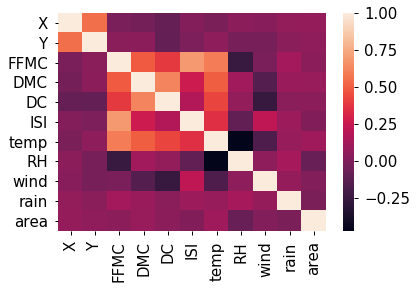

In [588]:
corr = df3.corr()
sns.heatmap(corr)

In [589]:
df3.columns
df4 = df3[[col for col in df3.columns if col not in ['X', 'Y', 'rain']]]

In [590]:
df4.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,area
count,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000
mean,0.564652,0.440175,0.685175,0.438171,0.513862,0.401947,0.383080,0.012814
std,0.189603,0.219159,0.285149,0.221728,0.174938,0.204069,0.185782,0.064543
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.480000,0.324648,0.615098,0.282609,0.406475,0.253731,0.255556,0.000000
50%,0.560000,0.431348,0.807487,0.391304,0.510791,0.373134,0.355556,0.000394
75%,0.670000,0.561621,0.866061,0.565217,0.629496,0.522388,0.500000,0.005537
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


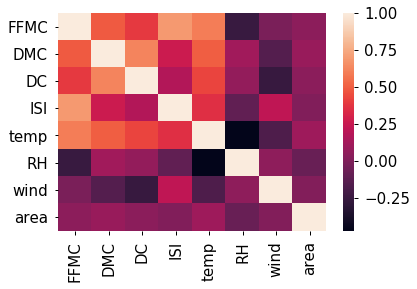

In [591]:
corr = df4.corr()
sns.heatmap(corr)

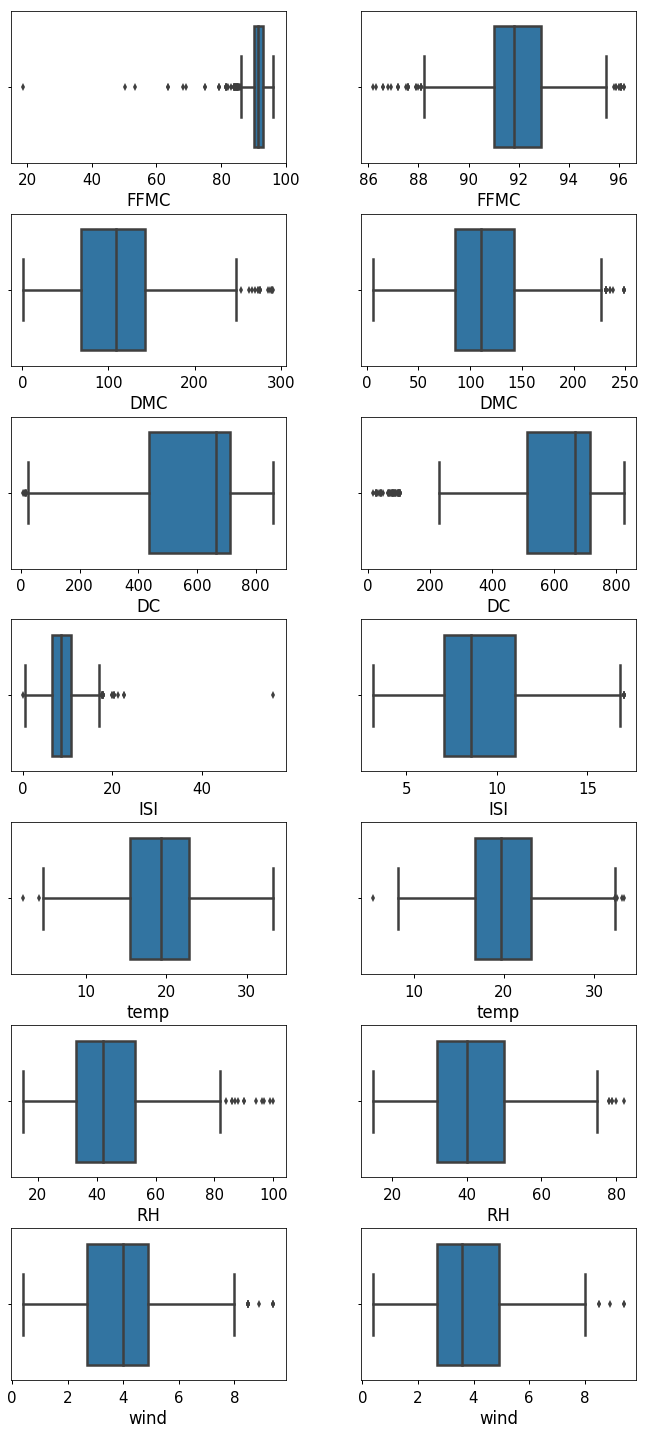

In [592]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
columns = ["FFMC", "DMC", "DC", "ISI", "temp", "RH", "wind"]
fig, ax = plt.subplots( ncols=2, nrows=len(columns), figsize=(10,20))
fig.tight_layout()
for i, col in enumerate(columns):
#     ax[i][0].set_title(col, y = y_title_margin)
    sns.boxplot(x=df[col], ax = ax[i][0])
    sns.boxplot(x=df2[col], ax = ax[i][1])

## Visualization

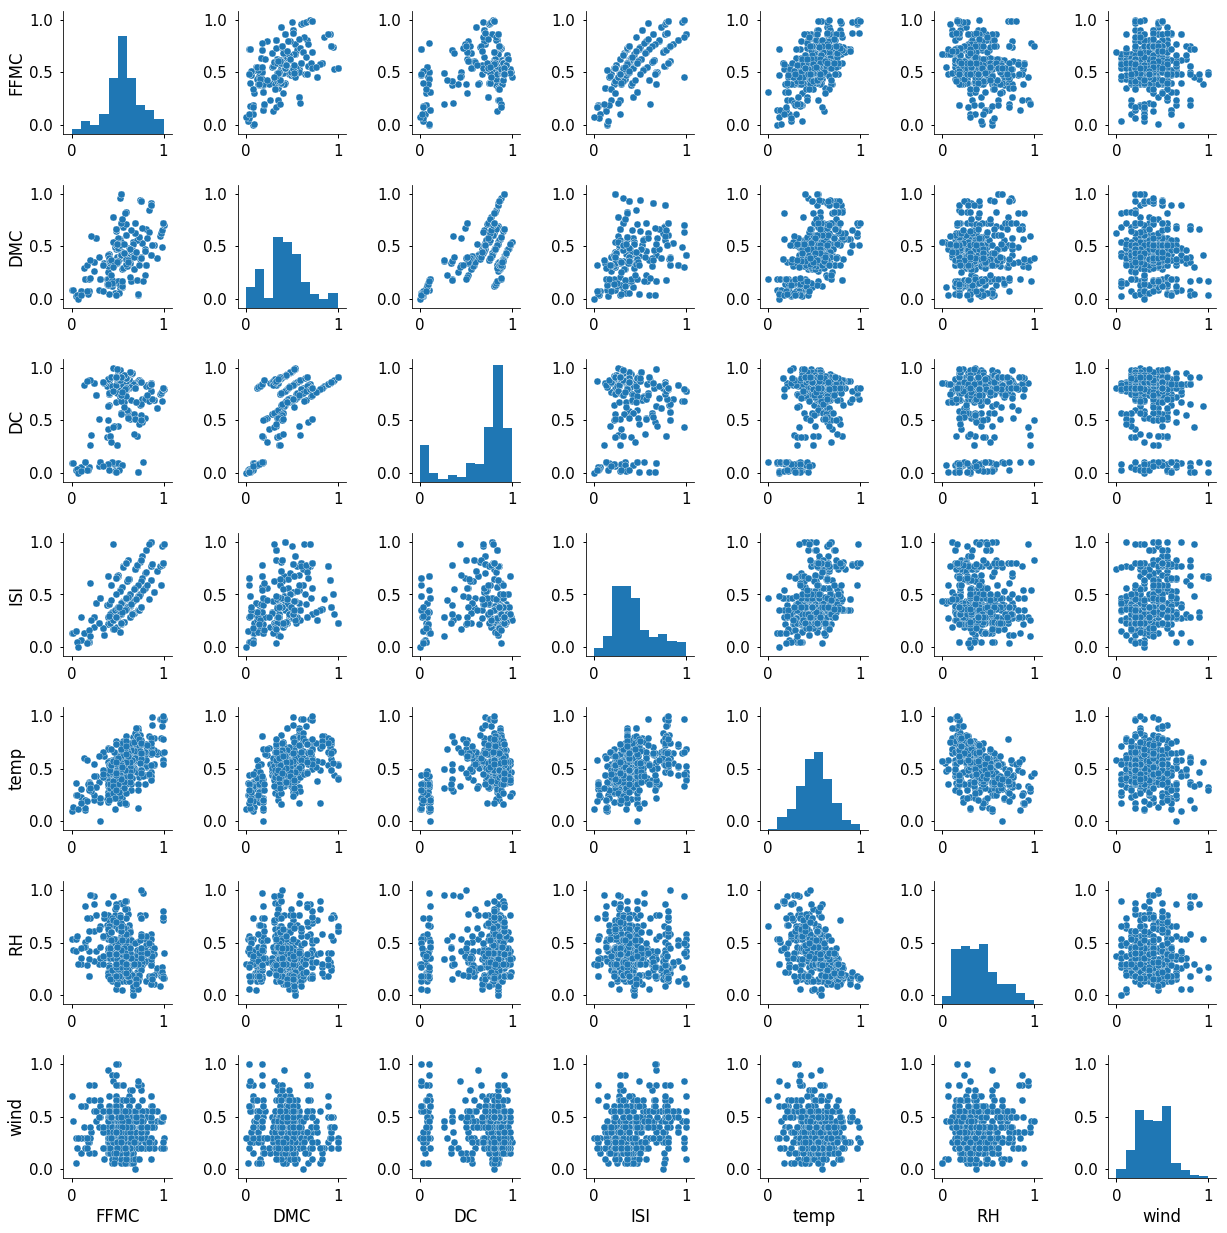

In [593]:
sns.pairplot(df4[columns])

In [594]:
df4.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,area
count,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000
mean,0.564652,0.440175,0.685175,0.438171,0.513862,0.401947,0.383080,0.012814
std,0.189603,0.219159,0.285149,0.221728,0.174938,0.204069,0.185782,0.064543
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.480000,0.324648,0.615098,0.282609,0.406475,0.253731,0.255556,0.000000
50%,0.560000,0.431348,0.807487,0.391304,0.510791,0.373134,0.355556,0.000394
75%,0.670000,0.561621,0.866061,0.565217,0.629496,0.522388,0.500000,0.005537
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [595]:
totalAreaByMonth = df4.groupby(['month'])['area'].sum()
totalAreaByMonth = totalAreaByMonth.fillna(0)

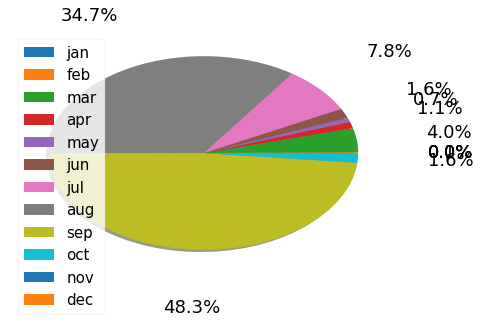

In [596]:
plt.pie(totalAreaByMonth.tolist(), autopct='%1.1f%%', pctdistance=1.6, shadow=True)
plt.legend(labels=cats[0], loc="best")
plt.tight_layout()